# Questões Teóricas

## Questão 1:
O que significa margem máxima em um SVM? Por que é preferível maximizar a margem ao invés de apenas separar corretamente as classes no conjunto de treino?

R: Margem máxima em SVM significa deixar a maior distância possível entre os pontos de dados para o hiperplano que os dividem. Ao deixarmos a margem mais distante, estamos assumindo o risco de que o modelo irá cometer alguns erros nas classificações das classes, mas em troca diminuimos as chances de overfitting e aumentamos a capacidade de generalização do modelo. Caso optássemos por dividir as classes corretamente 100% das vezes, teríamos um modelo extremamente bem adaptado aos dados de treino, mas com um desempenho ruim com novos dados.

## Questão 2:
Explique o papel do parâmetro 𝐶 em um SVM. O que acontece quando escolhemos um 𝐶 muito alto ou muito baixo? Como isso afeta a generalização do modelo?

R: Como já dito anteriormente, quando trabalhamos com SVM, normalmente optamos pelas margens máximas possíveis, de forma a diminuir o overfitting e aumentar a generalização. Isto é controlado pelo hiperparâmetro C: quando temos um C alto, temos margens mais estreitas (hard margin), e o modelo comete menos erros de classificação, porém terá mais dificuldade de trabalhar com dados novos. Em contrapartida, um C mais baixo implica em margens mais largas (soft margin), o que faz com que o modelo tolere alguns erros de classificação, mas que se adapte melhor a novas entradas de dados.

## Questão 3:
O que é o kernel trick e por que ele é útil em SVMs? Dê exemplos de problemas que não podem ser resolvidos apenas com separação linear.

R: O kernel trick é uma forma de trabalhar com dados que não são originalmente separáveis de forma clara. A ideia é calcular os pontos desses dados em espaços de dimensões maiores de forma com que um hiperplano consiga, efetivamente, dividir os dados. O detalhe é que esse espaço de maiores dimensões não é explicitamente construído.

Como exemplo de problemas de classificação não lineares podemos citar quaisquer problemas com dados de imagens, visto que sua complexidade não pode ser englobada apenas com uma reta, problemas em que os dados estejam arranjados em círculos ou espirais (por motivos óbvios) ou até mesmo problemas de análise de sentimentos em dados textuais.

## Questão 4:
Compare os kernels linear, polinomial e RBF. Quais são suas principais diferenças e em que situações cada um tende a funcionar melhor?

R:

* Linear: Funciona bem para dados que são linearmente separáveis (correlações lineares entre si), tem baixo risco de overfitting em dados simples e é computacionalmente barato.
* Polinomial: Funciona bem em dados com curvas simples (padrões não lineares simples), porém o risco de overfitting aumenta juntamente com o grau da equação. É normalmente utilizado quando as classes possuem correlações não-lineares entre si (sabidamente relações polinomiais - quadráticas ou cúbicas, usualmente), porém é computacionalmente mais caro que o kernel linear.
* RBF: Normalmente utilizado quando a relação entre as classes é desconhecida, onde são necessários padrões complexos para captura dessas relações. É altamente adaptável aos mais diferentes padrões através do ajuste do C e do gamma, porém é computacionalmente mais caro que os outros kernels.



# Questões Práticas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns

## Questão 1:
Gere um dataset sintético usando make_moons do pacote sklearn. Divida em treino (70%) e teste (30%) e visualize os dados. O conjunto é linearmente separável? Comente.

In [2]:
df = make_moons(n_samples=1000, noise=0.3, random_state=42)
X = df[0]
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37, stratify=y, shuffle=True)

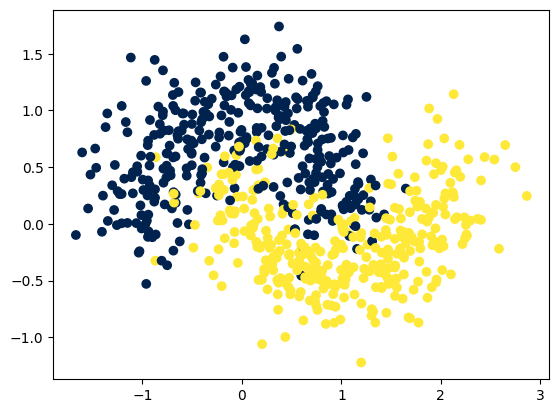

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
plt.show()

R: Nitidamente conseguimos ver que os dados não não linearmente separáveis, pois estão dispostos em formato de duas meia-luas entrecortadas. Quaisquer linhas (hiperplanos) que tentamos traçar fará com que um número significativo de dados será classificado erroneamente, especialmente no centro dos dados, onde há uma mistura maior entre as classes.

## Questão 2:
Treine um SVM com kernel linear no dataset e avalie a acurácia no conjunto de teste. Visualize a fronteira de decisão. O resultado é satisfatório? Por quê?

In [4]:
models = []
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print(f'Acurácia = {(accuracy_score(y_test, y_pred) * 100):.3f}%')

Acurácia = 84.667%


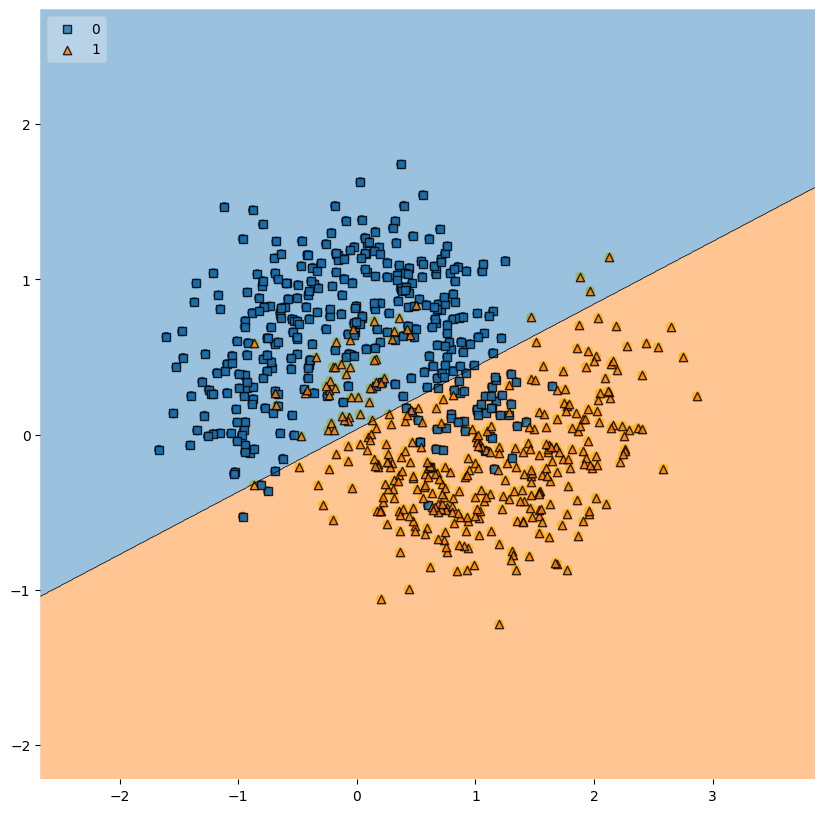

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
plot_decision_regions(X_train, y_train, clf=svm_lin, legend=2)
plt.show()

R: O resultado não é ideal, como esperávamos. Embora a acurácia global não seja das piores, a região central dos dados, onde há uma maior interseção entre as classes, está com alto índice de erros.

## Questão 3:
Treine um SVM com kernel polinomial (grau 2 e grau 3). Visualize as fronteiras de decisão e compare a acurácia com a do kernel linear. Houve melhora? Justifique.

In [6]:
svm_pol2 = SVC(kernel='poly', degree=2, C = 1, random_state=42)
svm_pol2.fit(X_train, y_train)
y_pred = svm_pol2.predict(X_test)
print(f'Acurácia = {(accuracy_score(y_test, y_pred) * 100):.3f}%')

Acurácia = 74.667%


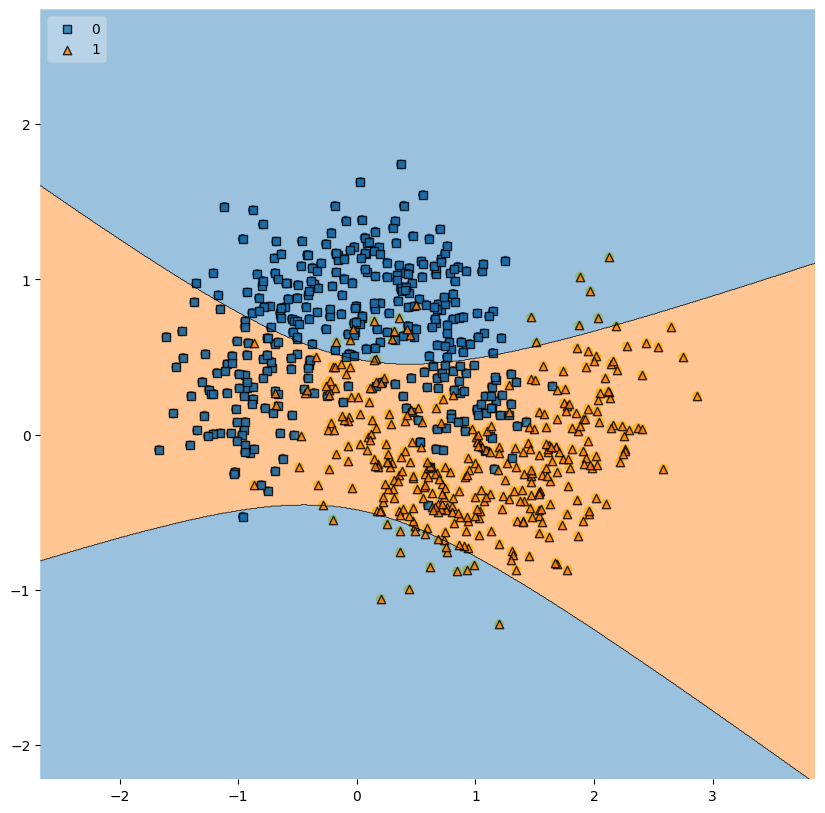

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
plot_decision_regions(X_train, y_train, clf=svm_pol2, legend=2)
plt.show()

In [8]:
svm_pol3 = SVC(kernel='poly', degree=3, C = 1, random_state=42)
svm_pol3.fit(X_train, y_train)
y_pred = svm_pol3.predict(X_test)
print(f'Acurácia = {(accuracy_score(y_test, y_pred) * 100):.3f}%')

Acurácia = 86.000%


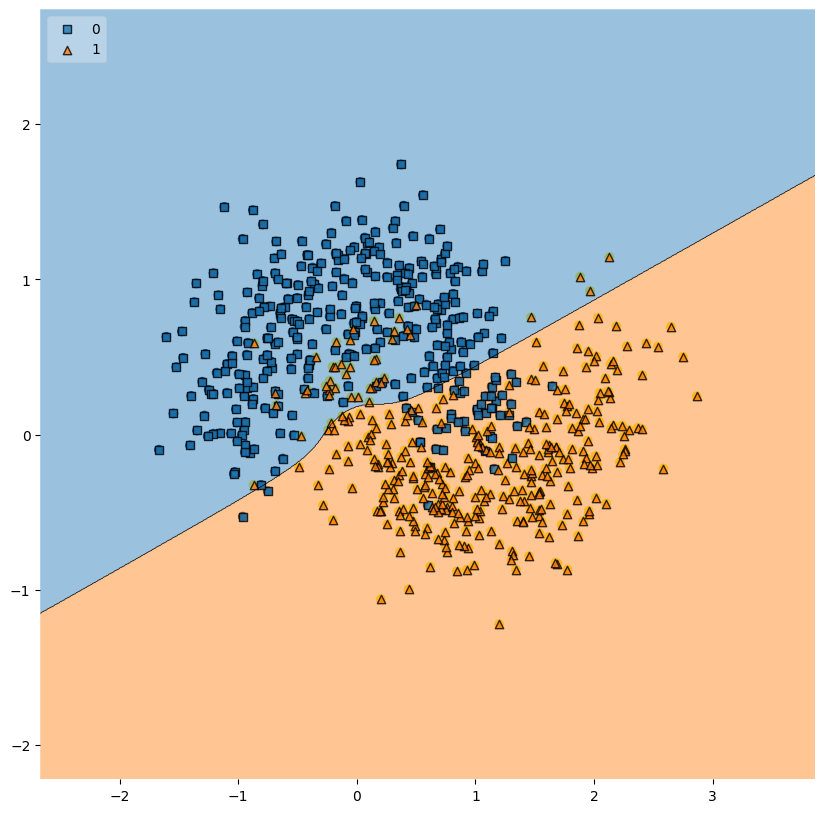

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
plot_decision_regions(X_train, y_train, clf=svm_pol3, legend=2)
plt.show()

R: O modelo polinomial de grau 3 teve uma discreta melhora quando comparado com o modelo linear, pois o hiperplano definido conseguiu capturar melhor a área central dos dados, onde as classes estavam mais misturadas. Entretanto, o modelo polinomial de grau 2 teve um desempenho bem pior do que o modelo linear

## Questão 4:
Treine um SVM com kernel RBF. Ajuste o parâmetro 𝛾 (ex: teste com 0.01, 0.1, 1, 10). Como o valor de 𝛾 afeta a fronteira de decisão e a acurácia? Mostre os resultados.

Gamma = 0.01
Acurácia = 83.667%


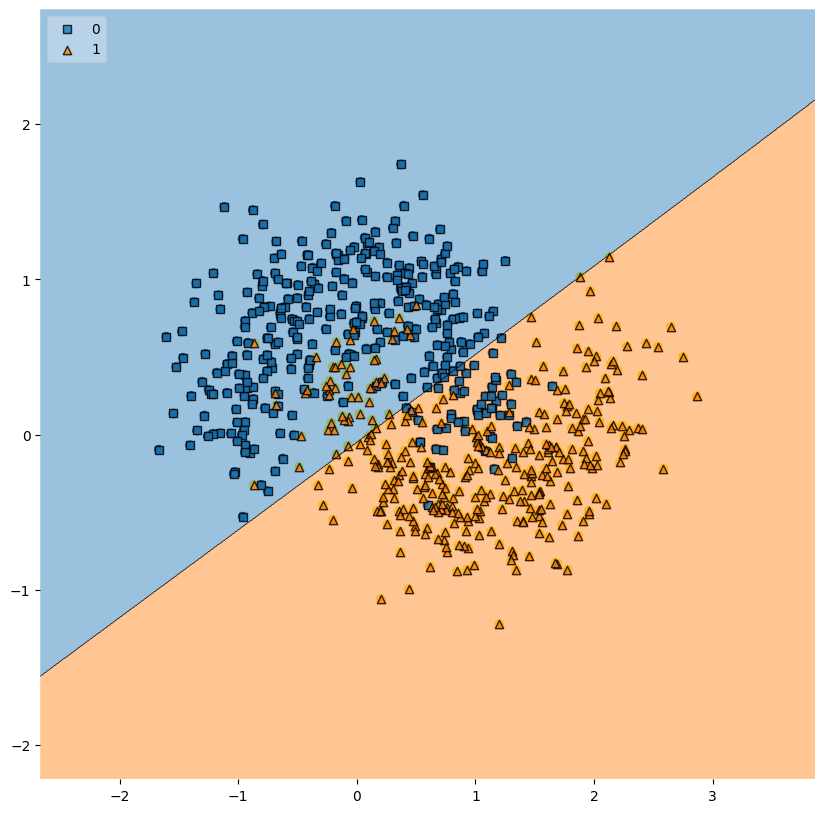

Gamma = 0.1
Acurácia = 85.000%


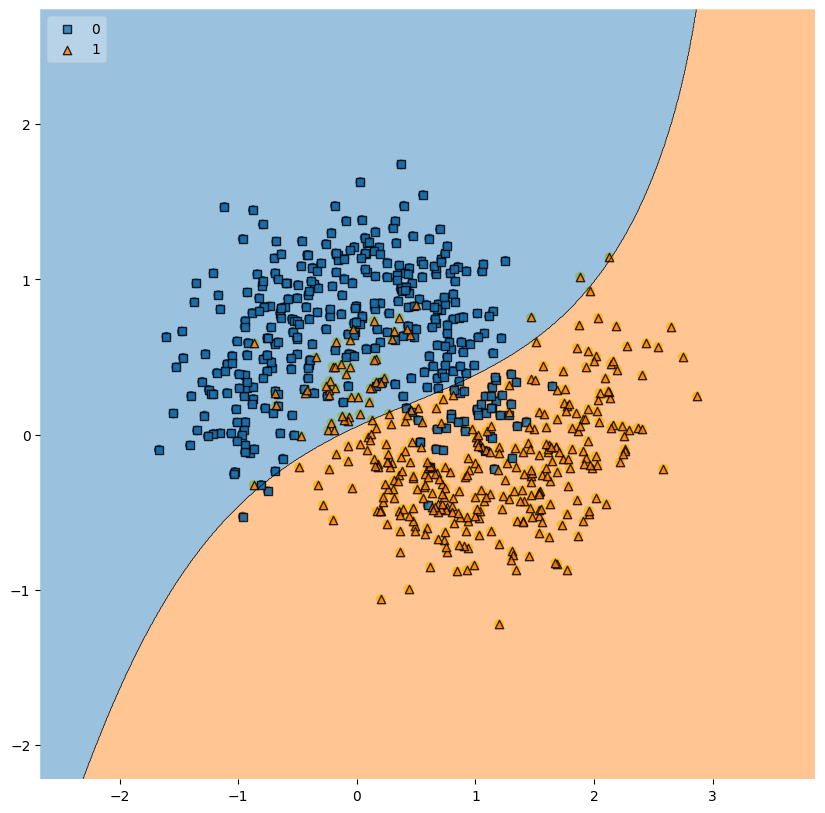

Gamma = 1
Acurácia = 91.667%


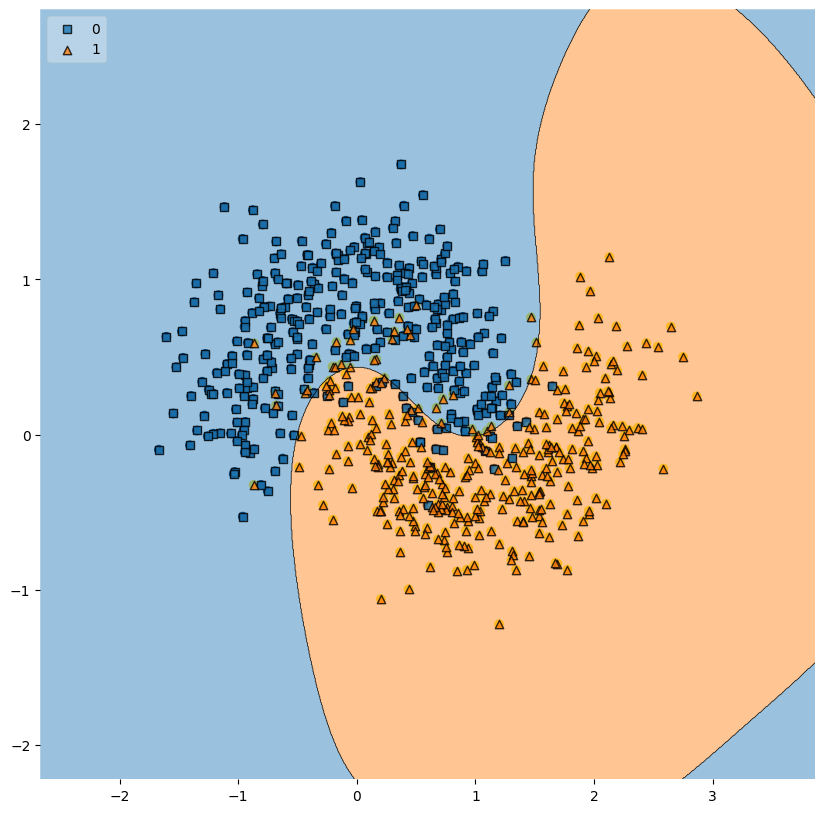

Gamma = 10
Acurácia = 92.000%


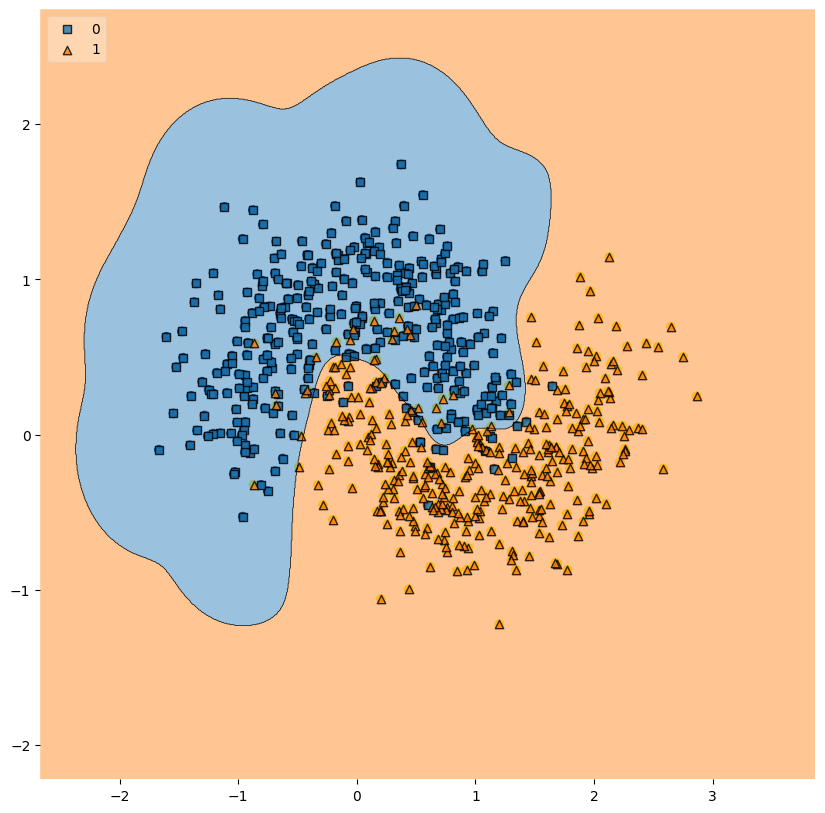

In [10]:
gammas = [0.01, 0.1, 1, 10]

for gamma in gammas:
    svm_rbf = SVC(kernel='rbf', gamma=gamma, C = 1, random_state=42)
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    print('='*50)
    print(f'Gamma = {gamma}')
    print(f'Acurácia = {(accuracy_score(y_test, y_pred) * 100):.3f}%')
    print('='*50)
    plt.figure(figsize=(10, 10))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
    plot_decision_regions(X_train, y_train, clf=svm_rbf, legend=2)
    plt.show()

R: O gamma é responsável por definir a suavidade das curvas do hiperplano calculado para divisão dos dados. Quanto maior o valor do gamma, mais fechadas são essas curvas, o que faz com que essa delimitação tenha uma tendência a construir "ilhas" de dados quando o gamma é suficientemente alto. Nesses casos, como as fronteiras de decisão vão seguindo o recorte dos dados, a acurácia do modelo aumenta conforme o gamma aumenta, porém também aumenta - e muito - o risco de overfitting do modelo.

## Questão 5:
Compare a acurácia e a matriz de confusão entre os modelos com kernel linear, polinomial e RBF. Qual teve melhor desempenho? Algum modelo sofreu overfitting?

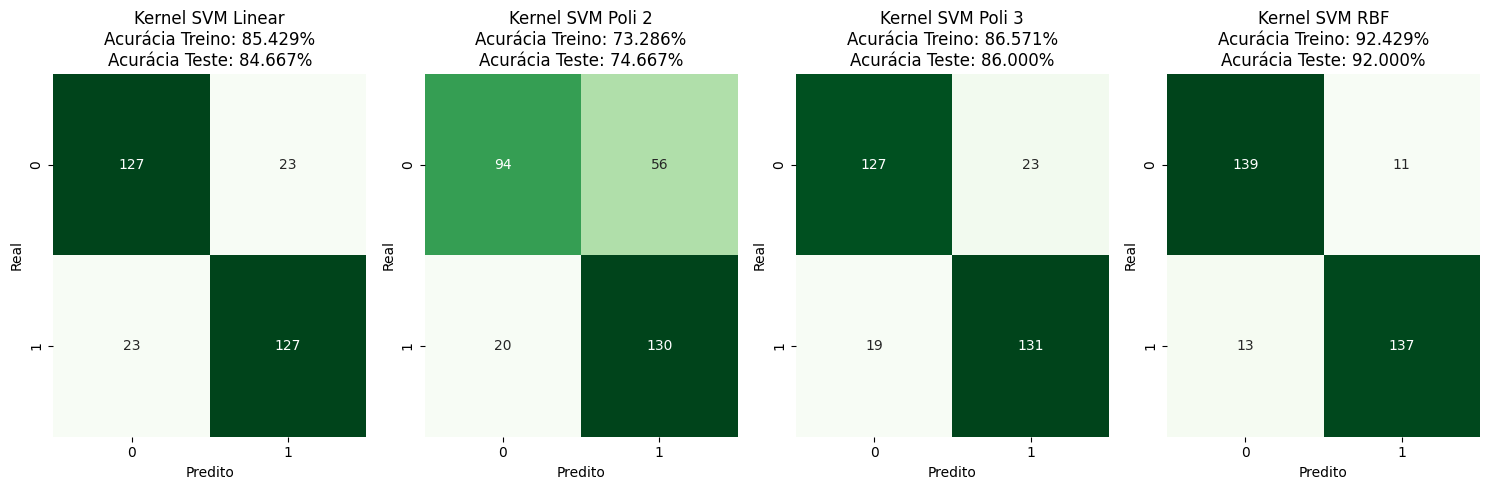

In [11]:
models = [svm_lin, svm_pol2, svm_pol3, svm_rbf]
model_names = ['SVM Linear', 'SVM Poli 2', 'SVM Poli 3', 'SVM RBF']

accuracies_test = []
accuracies_train = []
conf_matrices = []

for model in models:
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_pred) * 100
    accuracy_train = accuracy_score(y_train, y_pred_train) * 100
    cm = confusion_matrix(y_test, y_pred)

    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)
    conf_matrices.append(cm)

plt.figure(figsize=(15, 5))
for i, (name, cm) in enumerate(zip(model_names, conf_matrices)):
    plt.subplot(1, 4, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'Kernel {name}\nAcurácia Treino: {accuracies_train[i]:.3f}%\nAcurácia Teste: {accuracies_test[i]:.3f}%')
    plt.xlabel('Predito')
    plt.ylabel('Real')
plt.tight_layout()
plt.show()

R: O melhor modelo foi o kernel RBF, com o modelo polinomial de grau 3 ficando em segundo lugar. Nenhum dos modelos aparenta ter overfitting, e todos possuem uma boa capacidade de generalização.

## Questão 6:
Use validação cruzada (5-fold) para ajustar os melhores hiperparâmetros 𝐶 e 𝛾 para o kernel RBF. Qual combinação foi a vencedora?

In [12]:
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}

svm_rbf2 = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Melhores parâmetros: {grid_search.best_params_}')

Melhores parâmetros: {'C': 1, 'gamma': 10}


## Questão 7:
Treine o modelo RBF com os hiperparâmetros ajustados e avalie seu desempenho final no conjunto de teste. A acurácia melhorou em relação ao modelo padrão?

In [13]:
svm_rbf_final = SVC(kernel='rbf', **best_params)
svm_rbf_final.fit(X_train, y_train)
y_pred = svm_rbf_final.predict(X_test)
print(f'Acurácia = {(accuracy_score(y_test, y_pred) * 100):.3f}%')

Acurácia = 92.000%


R: Sim, depois de ajustarmos os hiperparâmetros do modelo RBF conseguimos obter um desempenho melhor ainda, ultrapassando 90% de acurácia.

## Questão 8:
Compare o SVM ajustado com um modelo de árvore de decisão, um KNN (k=5) e uma regressão logística no mesmo conjunto de dados. Qual modelo obteve melhor desempenho no teste? Algum deles parece mais sensível a outliers ou padrões não lineares?

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth= 10, criterion='gini', min_samples_split=4, min_samples_leaf=2, random_state=42)
log_reg = LogisticRegression()

models = [svm_rbf_final, knn, tree, log_reg]
model_names = ['RBF', 'KNN', 'Árvore de Decisão', 'Regressão Logística']

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_pred) * 100
    accuracy_train = accuracy_score(y_train, y_pred_train) * 100
    print('='*50)
    print(f'Modelo: {model_names[models.index(model)]}')
    print(f'Acurácia Treino: {accuracy_train:.3f}%')
    print(f'Acurácia Teste: {accuracy_test:.3f}%')
    print('='*50)

Modelo: RBF
Acurácia Treino: 92.429%
Acurácia Teste: 92.000%
Modelo: KNN
Acurácia Treino: 93.714%
Acurácia Teste: 91.333%
Modelo: Árvore de Decisão
Acurácia Treino: 97.286%
Acurácia Teste: 90.000%
Modelo: Regressão Logística
Acurácia Treino: 85.571%
Acurácia Teste: 85.000%


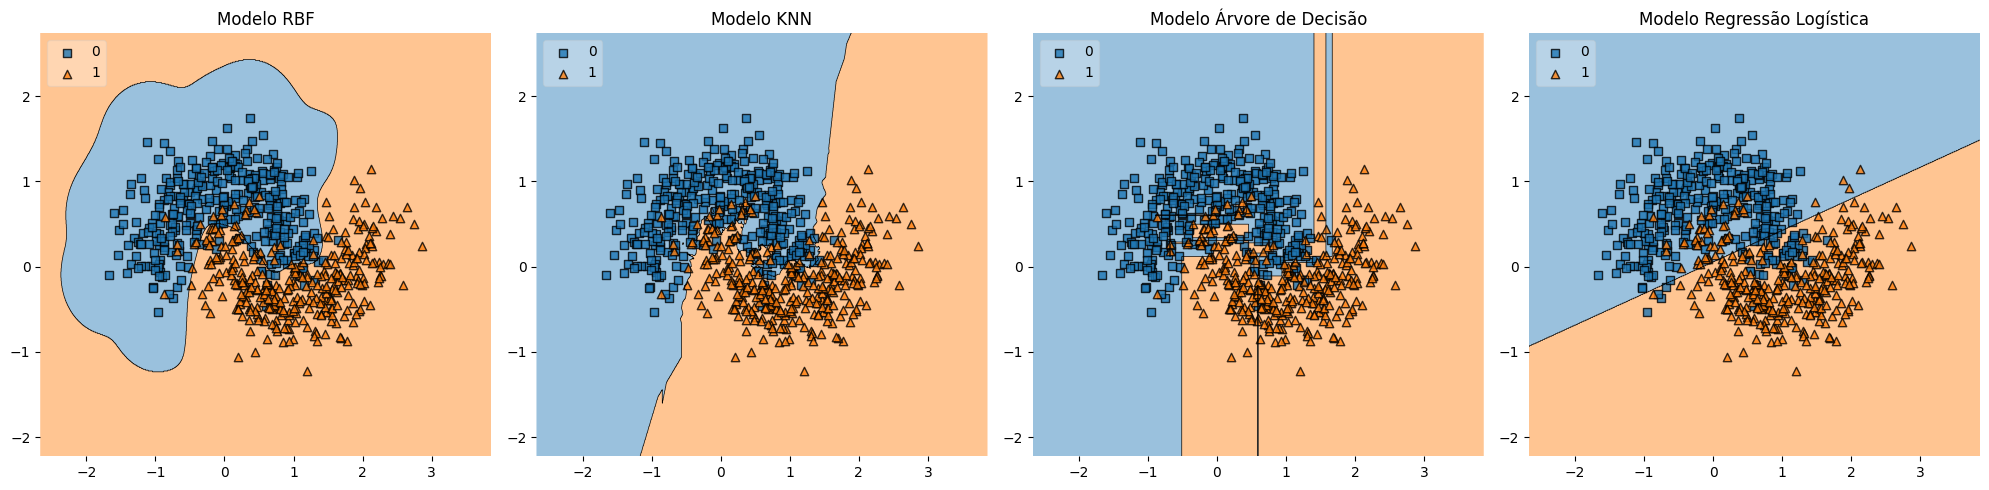

In [16]:
plt.figure(figsize=(20, 5))
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    plt.subplot(1, 4, i+1)
    plot_decision_regions(X_train, y_train, clf=model, legend=2)
    plt.title(f'Modelo {model_names[models.index(model)]}')
plt.tight_layout()
plt.show()

R: O modelo com melhor desempenho no conjunto de teste, como esperado, foi o modelo RBF. Analisando as fronteiras de decisão dos modelos, a árvore de decisão parece ser o modelo mais sensível a outliers, visto que podemos ver zonas criadas especialmente para englobar entradas de dados específicas no meio de dados da outra classe. O KNN e o RBF tiveram desempenhos parecidos em termos de acurácia global, visto que conseguiram trabalhar melhor com a curva natural dos dados.